# Create visualizations using `matplotlib`, `seaborn` and `folium`

## Setup

<p style="color: red">After each task you will be required to save your plots as an image or screenshot using the filenames specified.</p>

### Importing Required Libraries

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from folium import Map, Choropleth, GeoJsonTooltip

## Scenario

<p>In this assignment, you will be tasked with creating plots which answer questions for analysing <code>historical_automobile_sales</code> data to understand the historical trends in automobile sales during recession periods.</p>
<ul>
    <li><b>period 1</b> - year 1980</li>
    <li><b>period 2</b> - year 1981-1982</li>
    <li><b>period 3</b> - year 1991</li>
    <li><b>period 4</b> - year 2000-2001</li>
    <li><b>period 5</b> - year end 2007 to mid 2009</li>
    <li><b>period 6</b> - year 2020 February to April (Covid-19 Impact)</li>
</ul>

## Data Description

<p>The dataset used for this visualization assignment contains <code>historical_automobile_sales</code> data representing automobile sales and related variables during recession and non-recession period.</p>
<p>The dataset includes the following variables:</p>
<ol>
    <li><b>Date</b>: The date of the observation.</li>
    <li><b>Recession</b>: A binary variable indicating recession period. <code>1</code> means it was recession, <code>0</code> means it was normal.</li>
    <li><b>Automobile_Sales</b>: The number of vehicles sold during the period.</li>
    <li><b>GDP</b>: The per capita GDP value in USD.</li>
    <li><b>Unemployment_Rate</b>: The monthly unemployment rate.</li>
    <li><b>Consumer_Confidence</b>: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.</li>
    <li><b>Seasonality_Weight</b>: The weight representing the seasonality effect on automobile sales during the period.</li>
    <li><b>Price</b>: The average vehicle price during the period.</li>
    <li><b>Advertising_Expenditure</b>: The advertising expenditure of the company.</li>
    <li>
        <b>Vehicle_Type</b>: The type of vehicles sold.
        <ul>
            <li><code>Supperminicar</code></li>
            <li><code>Smallfamilycar</code></li>
            <li><code>Mediumfamilycar</code></li>
            <li><code>Executivecar</code></li>
            <li><code>Sports</code></li>
        </ul>
    </li>
    <li><b>Competition</b>: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.</li>
    <li><b>Month</b>: Month of the observation extracted from Date.</li>
    <li><b>Year</b>: Year of the observation extracted from Date.</li>
</ol>
<p>By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.</p>

## Importing Data

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)


def download_file(url: str) -> str:
    import requests
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
filename = download_file(data_url)

Downloading: 100.00% (54244 / 54244 bytes)
Download Complete.


In [4]:
df = pd.read_csv(filename)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## Creating Visualizations for Data Analysis

### Task 1

<p>Develop a <b>Line chart</b> using the functionality of <code>pandas</code> to show how automobile sales fluctuate from year to year.</p>

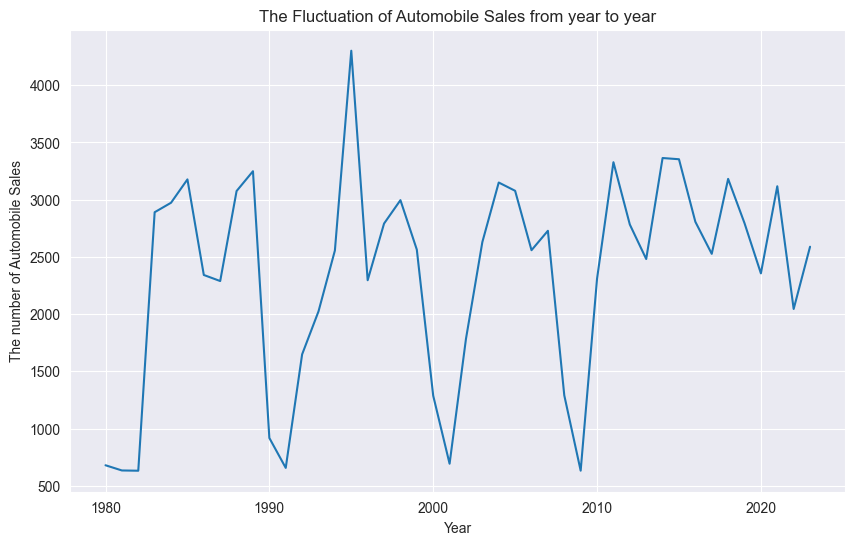

In [7]:
df_line = df.groupby(df.loc[:, "Year"])["Automobile_Sales"].mean()

plt.figure(figsize=(10, 6))
df_line.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("The number of Automobile Sales")
plt.title("The Fluctuation of Automobile Sales from year to year")
plt.show()

<p><b>Include the following on the plot</b></p>
<p><code>Ticks</code> on x-axis with all the years to identify the years of recession. <code>Annotation</code> for at least two years of recession. <code>Title</code> as automobile sales during recession.</p>
<p style="color: red">Please save this plot as "Line_Plot_1.png".</p>

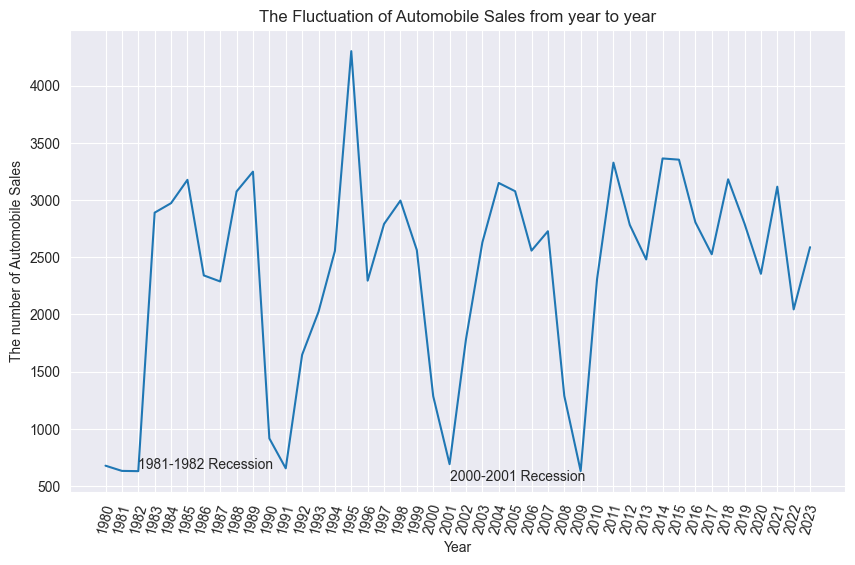

In [8]:
save_dir1 = os.path.join(dir_path, "Line_Plot_1.png")

plt.figure(figsize=(10, 6))
df_line.plot(kind="line")
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("The number of Automobile Sales")
plt.title("The Fluctuation of Automobile Sales from year to year")
plt.text(1982, 650, "1981-1982 Recession")
plt.text(2001, 550, "2000-2001 Recession")
plt.savefig(save_dir1)
plt.show()

### Task 2

<p>Plot different lines for categories of vehicle type and analyse the trend to answer the question. Is there a noticeable difference in sales trends between different vehicle types during recession periods?</p>
<p style="color: red">Please save this plot as "Line_Plot_2.png".</p>

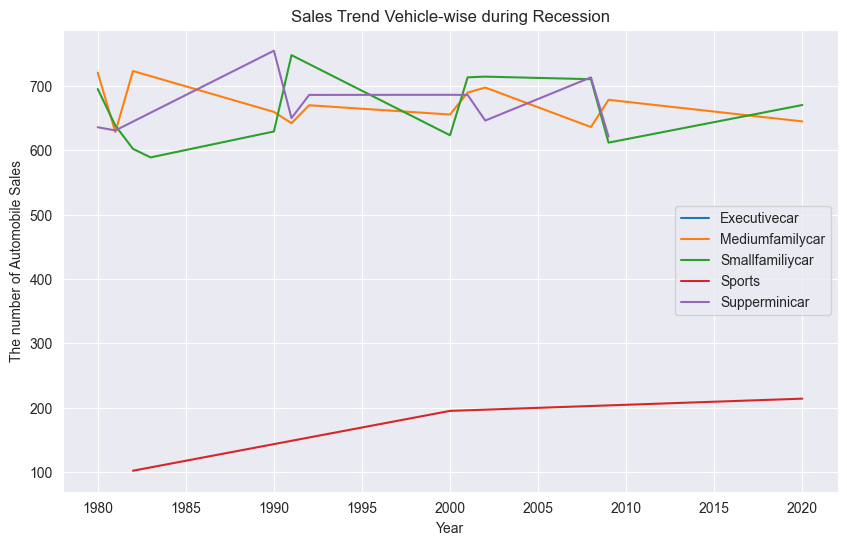

In [9]:
save_dir2 = os.path.join(dir_path, "Line_Plot_2.png")

df_rec = df.loc[df.loc[:, "Recession"] == 1]
df_mline = df_rec.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
df_mline = df_mline.set_index("Year")
df_mline = df_mline.groupby(["Vehicle_Type"])["Automobile_Sales"]

plt.figure(figsize=(10, 6))
df_mline.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("The number of Automobile Sales")
plt.title("Sales Trend Vehicle-wise during Recession")
plt.savefig(save_dir2)
plt.legend()
plt.show()

<p><b>Inference</b></p>
<p>From this plot, we can understand that during recession period, the sales for <code>Sports type vehicles</code> declined because of the high cost of the vehicle while sales of the <code>superminicar</code> and <code>smallfamilycar</code> increased.</p>

### Task 3

<p>Use the functionality of <code>seaborn</code> to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.</p>

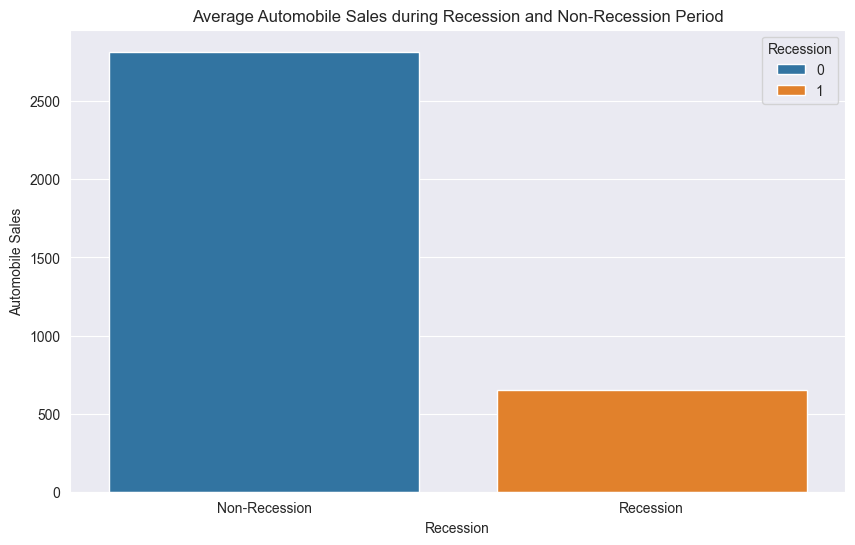

In [10]:
df_bar = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Recession", y="Automobile_Sales", hue="Recession", data=df_bar)
plt.xlabel("Recession")
plt.ylabel("Automobile Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession Period")
plt.xticks(ticks=[0, 1], labels=["Non-Recession", "Recession"])
plt.show()

<p>Now you want to compare the sales of different vehicle types during a recession and a non-recession period. We recommend that you use the functionality of <code>seaborn</code> to create this visualization.</p>
<p style="color: red">Please save this plot as "Bar_Chart.png".</p>

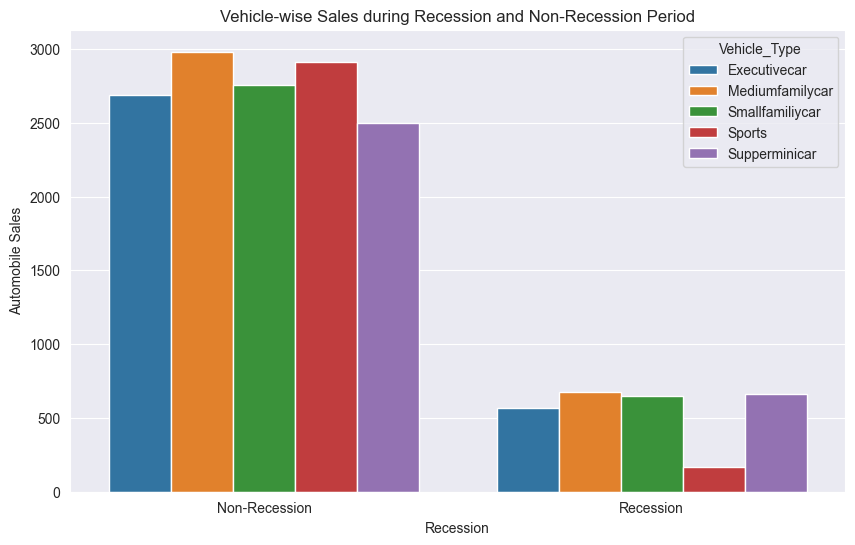

In [11]:
save_dir3 = os.path.join(dir_path, "Bar_Chart.png")

df_gbRV_AS = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Recession", y="Automobile_Sales", hue="Vehicle_Type", data=df_gbRV_AS)
plt.xticks(ticks=[0, 1], labels=["Non-Recession", "Recession"])
plt.xlabel("Recession")
plt.ylabel("Automobile Sales")
plt.title("Vehicle-wise Sales during Recession and Non-Recession Period")
plt.savefig(save_dir3)
plt.show()

<p><b>Inference</b></p>
<p>From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession. However, the most affected type of vehicle is <code>executivecar</code> and <code>sports</code>.</p>

### Task 4

<p>Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.</p>

<p>Now, you want to find more insights from the data to understand the reason. Plot a two line charts using <code>sub-plotting</code> to answer:</p>
<p>How did the GDP vary over time during recession and non-recession periods? Make use of <code>add_subplot()</code> from <code>matplotlib</code> for this comparision.</p>
<p style="color: red">Please save this plot as "Subplot.png".</p>

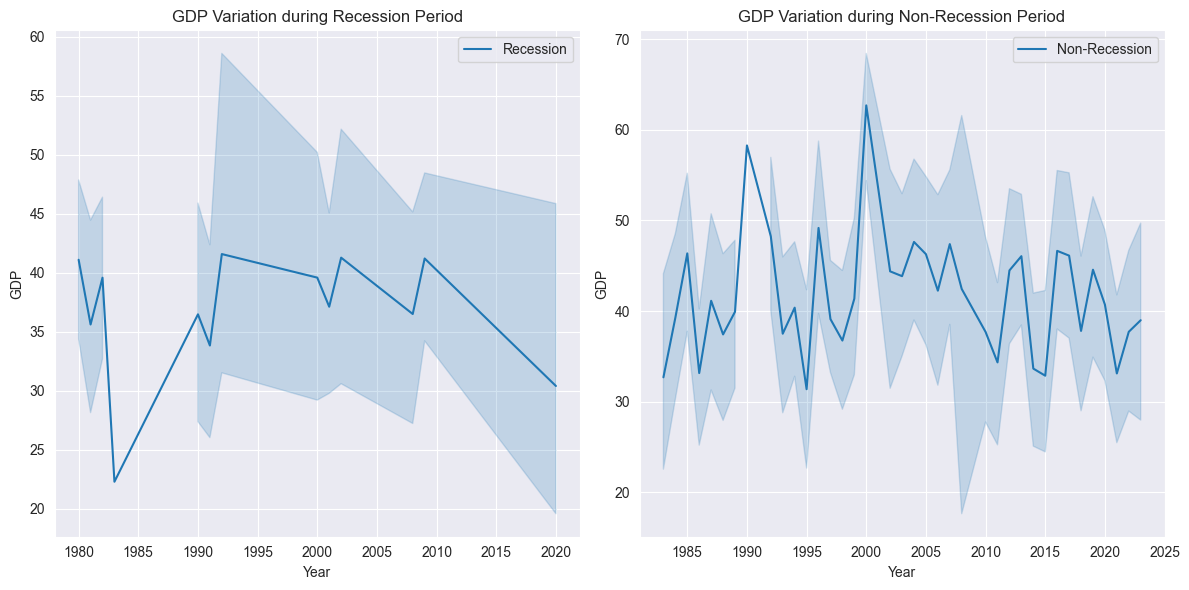

In [12]:
save_dir4 = os.path.join(dir_path, "Subplot.png")

df_rec = df.loc[df.loc[:, "Recession"] == 1]
df_non_rec = df.loc[df.loc[:, "Recession"] == 0]

fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x="Year", y="GDP", data=df_rec, label="Recession", ax=ax0)
ax0.set_xlabel("Year")
ax0.set_ylabel("GDP")
ax0.set_title("GDP Variation during Recession Period")

ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x="Year", y="GDP", data=df_non_rec, label="Non-Recession", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP")
ax1.set_title("GDP Variation during Non-Recession Period")

plt.tight_layout()
plt.savefig(save_dir4)
plt.show()

<p><b>Inference</b></p>
<p>From this plot, it is evident that during recession, the GDP of the country was in a low range, might have affected the overall sales of the company.</p>

### Task 5

<p>Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.</p>

<p>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend.</p>
<p>Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble.</p>
<p>Title this plot as "Seasonality impact on Automobile Sales".</p>
<p style="color: red">Please save this plot as "Bubble.png".</p>

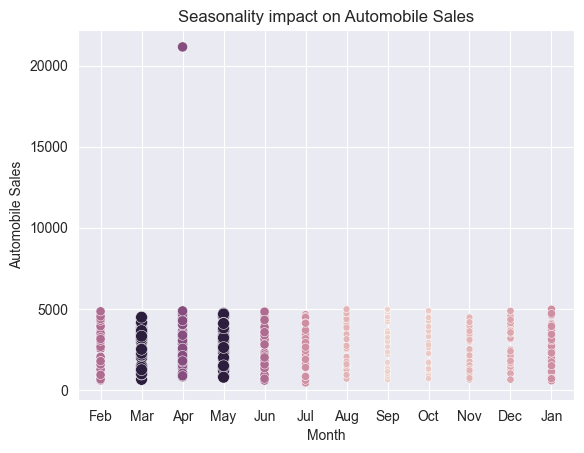

In [13]:
save_dir5 = os.path.join(dir_path, "Bubble.png")
size = df_non_rec.loc[:, "Seasonality_Weight"]

plt.figure()
sns.scatterplot(data=df_non_rec, x="Month", y="Automobile_Sales", size=size, hue="Seasonality_Weight", legend=False)

plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Seasonality impact on Automobile Sales")
plt.savefig(save_dir5)
plt.show()

### Task 6

<p>Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.</p>

<p>From the data, develop a scatter plot to identify if there is a correlation between consumer confidence and automobile sales during recession period?</p>
<p>Title this plot as "Consumer Confidence and Automobile Sales during Recessions".</p>

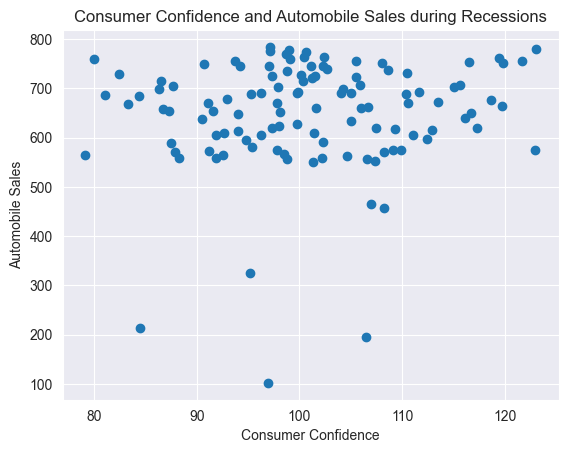

In [14]:
plt.figure()
plt.scatter(df_rec.loc[:, "Consumer_Confidence"], df_rec.loc[:, "Automobile_Sales"])

plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.show()

<p>How does the average vehicle price relate to the sales volume during recessions?</p>
<p>Plot another scatter plot and title it as "Relationship between Average Vehicle Price and Sales during Recessions".</p>
<p style="color: red">Please save this plot as "Scatter.png".</p>

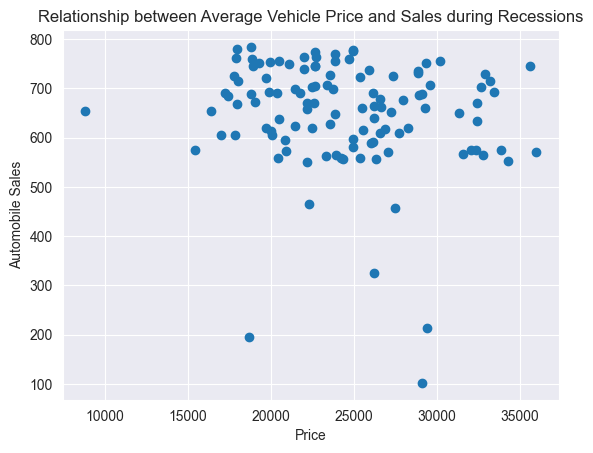

In [15]:
save_dir6 = os.path.join(dir_path, "Scatter.png")

plt.figure()
plt.scatter(df_rec.loc[:, "Price"], df_rec.loc[:, "Automobile_Sales"])
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.savefig(save_dir6)
plt.show()

<p><b>Inference</b></p>
<p>There is not much relation!</p>

### Task 7

<p>Create a pie chart to display the portion of advertising expenditure of <code>XYZAutomotives</code> during recession and non-recession periods.</p>
<p>How did the advertising expenditure of <code>XYZAutomotives</code> change during recession and non-recession periods?</p>
<p style="color: red">Please save this plot as "Pie_1.png".</p>

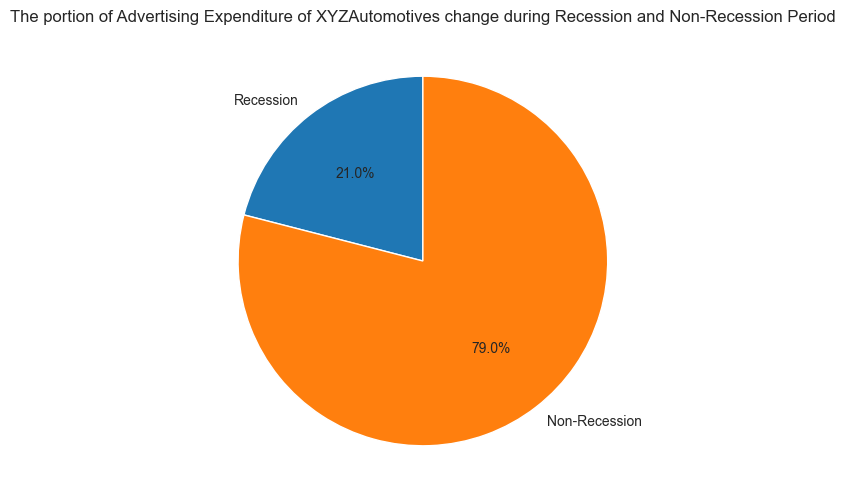

In [16]:
save_dir7 = os.path.join(dir_path, "Pie_1.png")

df_rec_total = df_rec.loc[:, "Advertising_Expenditure"].sum()
df_non_rec_total = df_non_rec.loc[:, "Advertising_Expenditure"].sum()

plt.figure(figsize=(8, 6))

labels = ["Recession", "Non-Recession"]
sizes = [df_rec_total, df_non_rec_total]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("The portion of Advertising Expenditure of XYZAutomotives change during Recession and Non-Recession Period")
plt.savefig(save_dir7)
plt.show()

<p><b>Inference</b></p>
<p>It seems <code>ABCAutomotives</code> has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!</p>

### Task 8

<p>Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.</p>
<p>Can we observe the share of each vehicle type in total expenditure during recessions?</p>
<p style="color: red">Please save this plot as "Pie_2.png".</p>

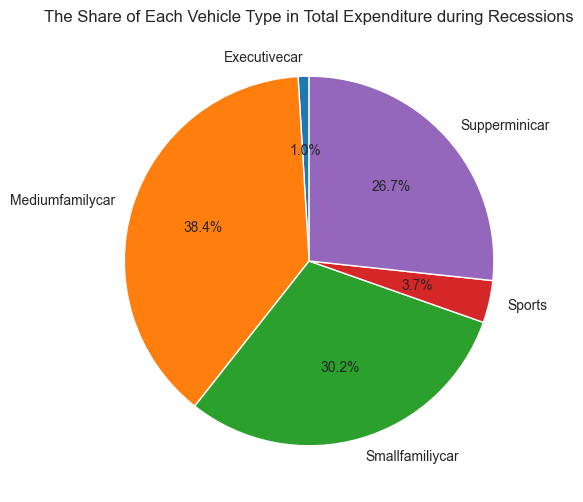

In [17]:
save_dir8 = os.path.join(dir_path, "Pie_2.png")
VTExpenditure = df_rec.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

plt.figure(figsize=(8, 6))

labels = VTExpenditure.index
sizes = VTExpenditure.values
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)

plt.title("The Share of Each Vehicle Type in Total Expenditure during Recessions")
plt.savefig(save_dir8)
plt.show()

<p><b>Inference</b></p>
<p>During recession the advertisements were mostly focused on low price range vehicle. A wise decision!</p>

### Task 9

<p>Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.</p>

<p>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.</p>
<p>You can create a lineplot and title the plot as "Effect of Unemployment Rate on Vehicle Type and Sales".</p>
<p style="color: red">Please save this plot as "Line_Plot_3.png".</p>

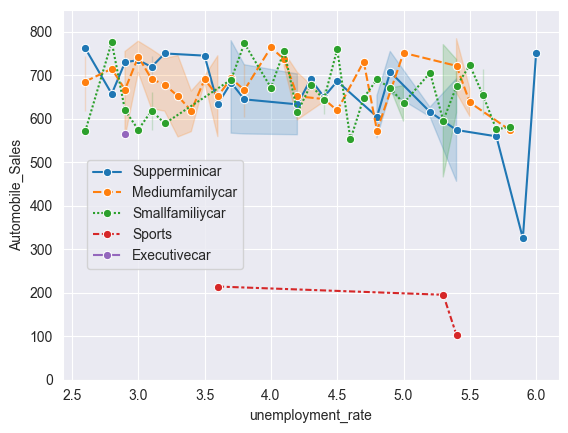

In [18]:
save_dir9 = os.path.join(dir_path, "Line_Plot_3.png")

plt.figure()

sns.lineplot(data=df_rec, x="unemployment_rate", y="Automobile_Sales", hue="Vehicle_Type", style="Vehicle_Type",
             marker="o")

plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))
plt.savefig(save_dir9)
plt.show()

<p><b>Inference</b></p>
<p>During recession, buying pattern changed, the sales of low range vehicle like <code>superminicar</code>, <code>smallfamilycar</code> and <code>Mediumminicar</code>.</p>

### Task 10 [Optional]

<p>Create a map on the highest sales region/offices of the company during recession period.</p>

In [19]:
data_url_opt = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
json_file = download_file(data_url_opt)

Downloading: 100.00% (87689 / 87689 bytes)
Download Complete.


<p>You found that the dataset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth.</p>

In [20]:
df_gbC_AS = df_rec.groupby("City")["Automobile_Sales"].sum().reset_index()

map1 = Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = Choropleth(
    geo_data=json_file,
    data=df_gbC_AS,
    columns=["City", "Automobile_Sales"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Automobile Sales during Recession"
).add_to(map1)

choropleth.geojson.add_child(
    GeoJsonTooltip(["name"], labels=True)
)

map1

****
This is the end of the file.
****